In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [2]:
def score_model(model, x, y, n_splits=10, n_repeats=10):
    scoring = 'neg_root_mean_squared_error'
    cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=seed)
    scores = cross_val_score(model, x, y, scoring=scoring, cv=cv, n_jobs=-1)
    return scores

In [3]:
def plot_predictions(linreg_model, df, index, x, y):
    d = df['Data/Hora'].values
    test_series = pd.DataFrame({'ccs28':y}, index=pd.to_datetime(d))
    pred_series = linreg_model.predict(scaler.transform(x))
    pred_series = pd.DataFrame({'ccs28-pred' : pred_series}, index=pd.to_datetime(d))

    fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))

    test_series.plot(ax=ax)
    ax.axvline(test_series.index[index], color='r') # end of train dataset
    pred_series[index:].plot(ax=ax)
    ax.grid(which="both")
    ax.legend(["train and test series", "end of train series", 'predicted'], loc="upper left")
    # ax.set_xlabel('Period', labelpad=20, fontsize=15)
    ax.set_ylabel('Compressive Strength - MPa', labelpad=20, fontsize=15)
    plt.show()

In [4]:
name = "dados-historicos-partner_i-cement-CPIIE40.csv"
df_r3d_and_r7d = pd.read_csv("../../data/interim/" + "r3d-and-r7d-" + name)
df_r3d_only = pd.read_csv("../../data/interim/" + "r3d-only-" + name)
df_no_r3d_r7d = pd.read_csv("../../data/interim/" + "no-r3d-r7d-" + name)

In [5]:
seed = 47
scaler = StandardScaler()

# Linear Regression

In [6]:
linreg_model = LinearRegression()

<h2> Here we will make a Repeated KFold Cross validation with all 3 datasets</h2>

<h3>Experiment 1</h3>
<h4> Repeated KFold Cross Validation - df_no_r3d_r7d</h4>

<b>Dataset: df_no_r3d_r7d:</b> In this dataset the R3D and R7D variables are not considered.

In [7]:
y = df_no_r3d_r7d.pop('R28D').values
x = df_no_r3d_r7d.drop(['Data/Hora'], axis=1).values

In [8]:
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=seed)
scores = []

for train, test in rkf.split(x):
    linreg_model.fit(scaler.fit_transform(x[train]), y[train])
    rmse = mean_squared_error(y[test], linreg_model.predict(scaler.transform(x[test])), squared=False)
    scores.append(rmse)
    
print('RMSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

RMSE: 1.181 (0.105)


In [9]:
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=seed)
scores = cross_val_score(linreg_model, x, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
scores = np.abs(scores)
print('RMSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

RMSE: 1.181 (0.105)


In [10]:
scores = score_model(linreg_model, x, y, n_splits=10, n_repeats=10)
scores = np.abs(scores)
print('RMSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

RMSE: 1.181 (0.105)


In [11]:
repeats = range(1,16)
results = list()

print("RMSE")
for r in repeats:
    scores = score_model(linreg_model, x, y, n_repeats=r)
    scores = np.abs(scores)
    print('>%d mean=%.4f std=%.3f se=%.3f' % (r, np.mean(scores), np.std(scores), np.std(scores)/np.sqrt(r)))
    results.append(scores)

RMSE
>1 mean=1.1993 std=0.126 se=0.126
>2 mean=1.1905 std=0.121 se=0.086
>3 mean=1.1867 std=0.121 se=0.070
>4 mean=1.1857 std=0.112 se=0.056
>5 mean=1.1832 std=0.113 se=0.051
>6 mean=1.1837 std=0.108 se=0.044
>7 mean=1.1823 std=0.105 se=0.040
>8 mean=1.1811 std=0.107 se=0.038
>9 mean=1.1818 std=0.106 se=0.035
>10 mean=1.1808 std=0.105 se=0.033
>11 mean=1.1811 std=0.102 se=0.031
>12 mean=1.1816 std=0.101 se=0.029
>13 mean=1.1821 std=0.102 se=0.028
>14 mean=1.1810 std=0.102 se=0.027
>15 mean=1.1817 std=0.101 se=0.026


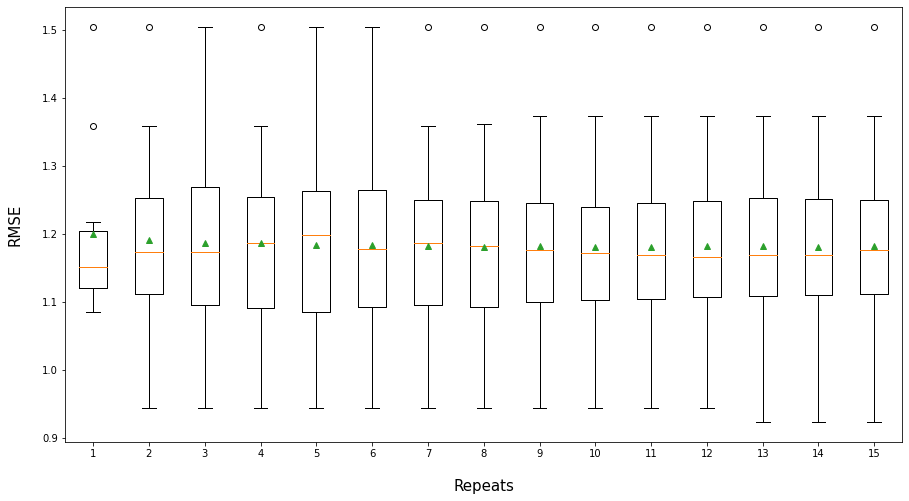

In [12]:
plt.figure(figsize=(15,8))
plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.ylabel('RMSE', labelpad=20, fontsize=15)
plt.xlabel('Repeats', labelpad=20, fontsize=15)
plt.show()

In [13]:
linreg_model = LinearRegression()
index = -98

linreg_model.fit(scaler.fit_transform(x[:index]), y[:index])
y_pred = linreg_model.predict(scaler.transform(x[index:]))
print('RMSE:', mean_squared_error(y_pred, y[index:], squared=False))

RMSE: 3.4155082193159183


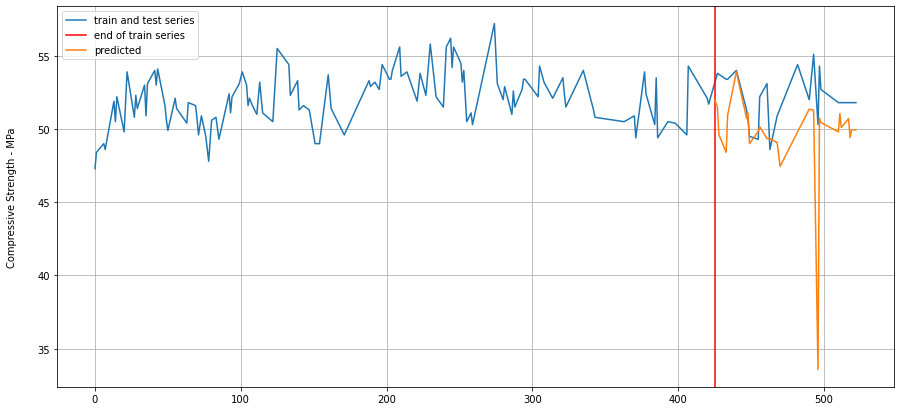

In [14]:
test_series = pd.DataFrame({'ccs28':y})
pred_series = linreg_model.predict(scaler.transform(x))
pred_series = pd.DataFrame({'ccs28-pred' : pred_series})

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))

test_series.plot(ax=ax)
ax.axvline(test_series.index[index], color='r') # end of train dataset
pred_series[index:].plot(ax=ax)
ax.grid(which="both")
ax.legend(["train and test series", "end of train series", 'predicted'], loc="upper left")
ax.set_ylabel('Compressive Strength - MPa', labelpad=20)
plt.show()

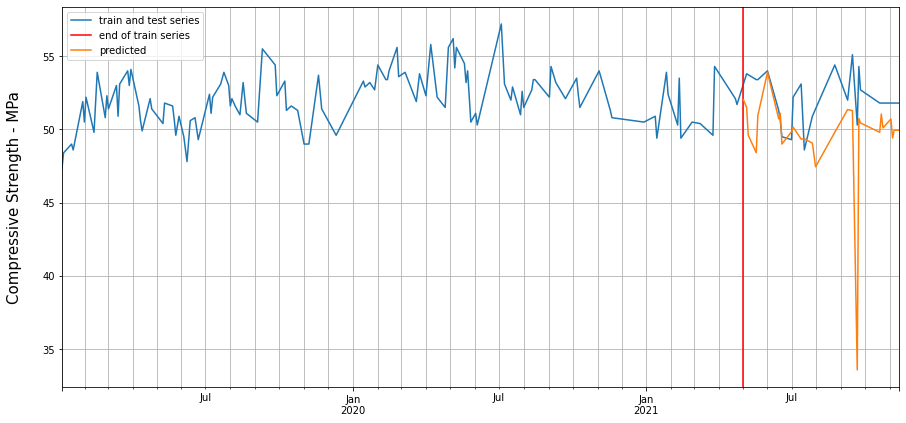

In [15]:
plot_predictions(linreg_model, df_no_r3d_r7d, index, x, y)

<h3>Experiment 2</h3>
<h4> Repeated KFold Cross Validation - df_r3d-only</h4>

<b>Dataset: df_r3d-only:</b> In this dataset the R7D variable is not considered.

In [16]:
pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', LinearRegression())])

In [17]:
y = df_r3d_only.pop('R28D').values
x = df_r3d_only.drop(['Data/Hora'], axis=1).values

In [18]:
scores = score_model(pipeline, x, y, n_splits=10, n_repeats=10)
scores = np.abs(scores)
print('RMSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

RMSE: 1.190 (0.103)


In [19]:
# https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

repeats = range(1,16)
results = list()

print("RMSE")
for r in repeats:
    scores = score_model(pipeline, x, y, n_repeats=r)
    scores = np.abs(scores)
    print('>%d mean=%.4f std=%.3f se=%.3f' % (r, np.mean(scores), np.std(scores), np.std(scores)/np.sqrt(r)))
    results.append(scores)

RMSE
>1 mean=1.2083 std=0.125 se=0.125
>2 mean=1.1977 std=0.122 se=0.086
>3 mean=1.1950 std=0.120 se=0.070
>4 mean=1.1947 std=0.110 se=0.055
>5 mean=1.1914 std=0.111 se=0.050
>6 mean=1.1924 std=0.106 se=0.043
>7 mean=1.1907 std=0.104 se=0.039
>8 mean=1.1892 std=0.106 se=0.037
>9 mean=1.1905 std=0.105 se=0.035
>10 mean=1.1896 std=0.103 se=0.033
>11 mean=1.1900 std=0.100 se=0.030
>12 mean=1.1906 std=0.099 se=0.029
>13 mean=1.1913 std=0.100 se=0.028
>14 mean=1.1902 std=0.101 se=0.027
>15 mean=1.1910 std=0.100 se=0.026


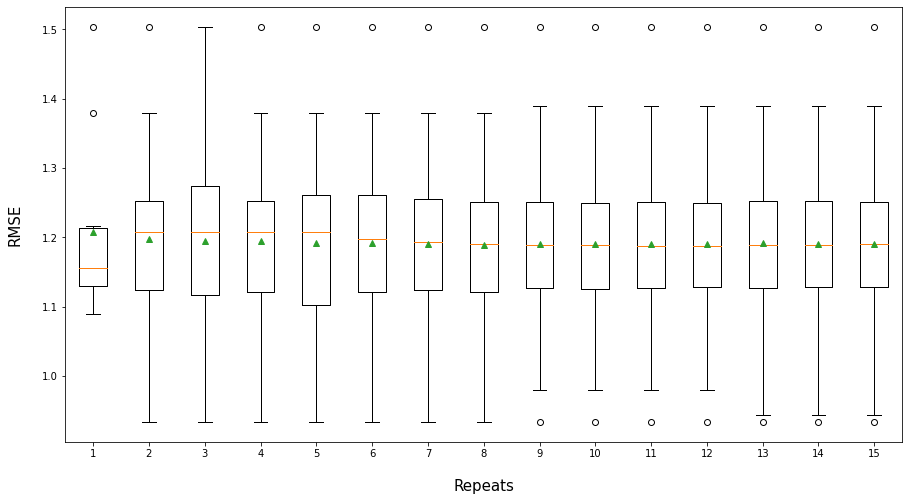

In [20]:
plt.figure(figsize=(15,8))
plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.ylabel('RMSE', labelpad=20, fontsize=15)
plt.xlabel('Repeats', labelpad=20, fontsize=15)
plt.show()

In [21]:
linreg_model = LinearRegression()
index = -98
linreg_model.fit(scaler.fit_transform(x[:index]), y[:index])
y_pred = linreg_model.predict(scaler.transform(x[index:]))
print('RMSE:', mean_squared_error(y_pred, y[index:], squared=False))

RMSE: 3.6192854652692215


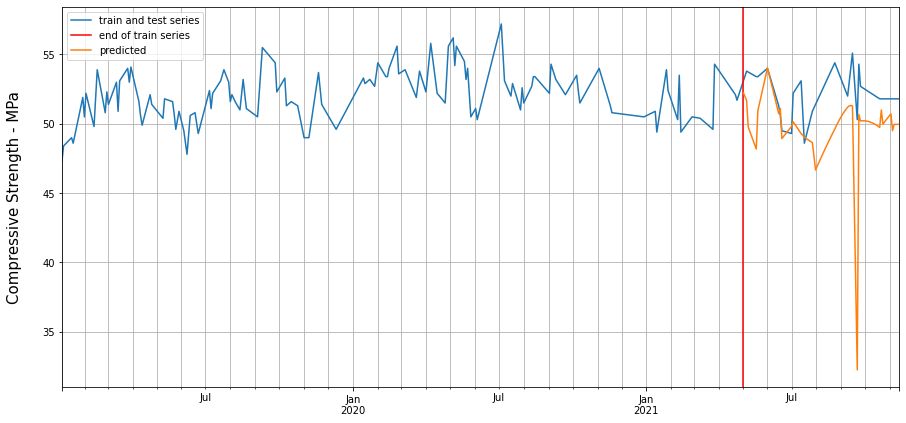

In [22]:
plot_predictions(linreg_model, df_r3d_only, index, x, y)

<h3>Experiment 3</h3>
<h4> Repeated KFold Cross Validation - df_r3d-and-rd7</h4>

<b>Dataset: df_r3d_and_r7d:</b> In this dataset both R3D and R7D variables are considered.

In [23]:
y = df_r3d_and_r7d.pop('R28D').values
x = df_r3d_and_r7d.drop(['Data/Hora'], axis=1).values

In [24]:
pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', LinearRegression())])
scores = score_model(pipeline, x, y, n_splits=10, n_repeats=10)
scores = np.abs(scores)
print('RMSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

RMSE: 1.135 (0.100)


In [25]:
repeats = range(1,16)
results = list()

print("RMSE")
for r in repeats:
    scores = score_model(pipeline, x, y, n_repeats=r)
    scores = np.abs(scores)
    print('>%d mean=%.4f std=%.3f se=%.3f' % (r, np.mean(scores), np.std(scores), np.std(scores)/np.sqrt(r)))
    results.append(scores)

RMSE
>1 mean=1.1501 std=0.131 se=0.131
>2 mean=1.1434 std=0.111 se=0.078
>3 mean=1.1399 std=0.108 se=0.062
>4 mean=1.1396 std=0.098 se=0.049
>5 mean=1.1360 std=0.105 se=0.047
>6 mean=1.1367 std=0.101 se=0.041
>7 mean=1.1348 std=0.102 se=0.038
>8 mean=1.1339 std=0.102 se=0.036
>9 mean=1.1356 std=0.101 se=0.034
>10 mean=1.1345 std=0.100 se=0.032
>11 mean=1.1351 std=0.097 se=0.029
>12 mean=1.1361 std=0.095 se=0.027
>13 mean=1.1363 std=0.098 se=0.027
>14 mean=1.1354 std=0.098 se=0.026
>15 mean=1.1364 std=0.100 se=0.026


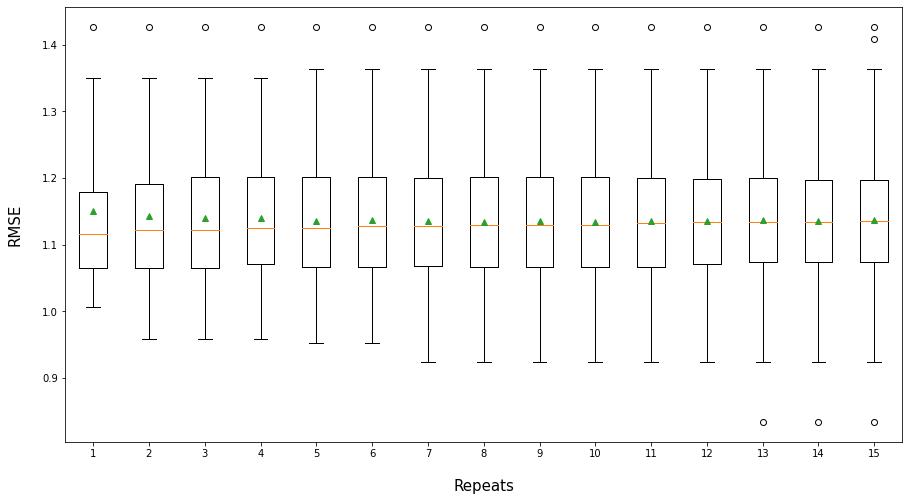

In [26]:
plt.figure(figsize=(15,8))
plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.ylabel('RMSE', labelpad=20, fontsize=15)
plt.xlabel('Repeats', labelpad=20, fontsize=15)
plt.show()

In [27]:
linreg_model = LinearRegression()
index = -98
linreg_model.fit(scaler.fit_transform(x[:index]), y[:index])
y_pred = linreg_model.predict(scaler.transform(x[index:]))
print('RMSE:', mean_squared_error(y_pred, y[index:], squared=False))

RMSE: 3.5087165410011565


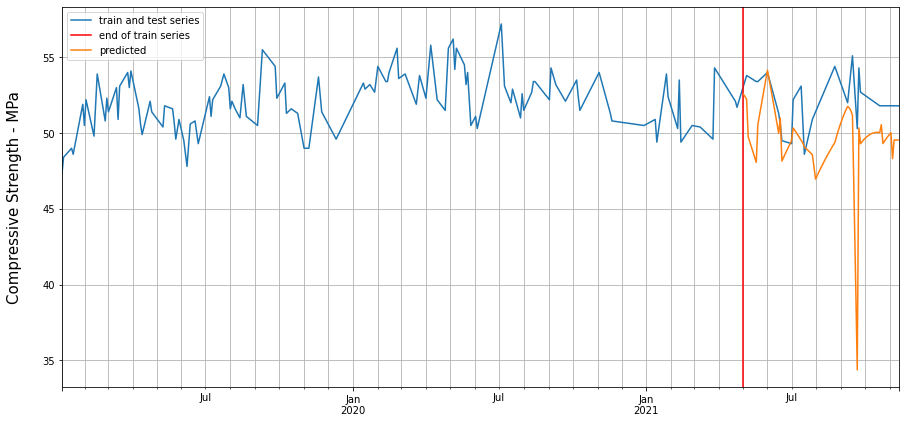

In [28]:
plot_predictions(linreg_model, df_r3d_and_r7d, index, x, y)

In [29]:
linreg_model = LinearRegression()
index = -98
linreg_model.fit(scaler.fit_transform(x[:index]), y[:index])
y_pred = linreg_model.predict(scaler.transform(x[index:]))
print('RMSE:', mean_squared_error(y_pred, y[index:], squared=False))

RMSE: 3.5087165410011565


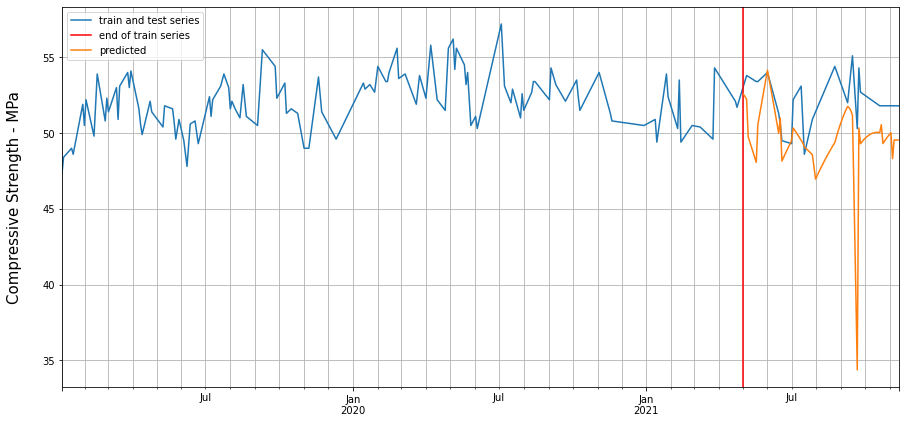

In [30]:
plot_predictions(linreg_model, df_r3d_and_r7d, index, x, y)